# Project 3:  Reddit Posts Classification Analysis

### Muhammad Tahir @ Data Science Immersive at General Assembly

## Par-1:  Imports and Data Extraction

## Imports

In [2]:
# Required Imports 
import pandas as pd
import numpy as np
import requests
import time
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
import regex as re
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
import seaborn as sns

## Data Extraction

In [3]:
# https://www.reddit.com/r/conspiracy/ & https://www.reddit.com/r/TheOnion/

In [4]:
url_onion = 'https://www.reddit.com/r/TheOnion/.json'
url_conspiracy = 'https://www.reddit.com/r/conspiracy/.json'
user_header = {'User-agent': 'JaneJacobs'} # header to prevent error 429

In [5]:
def get_subreddit(url, n_pulls, header):
    # initialize empty requirements
    posts = []
    after = None
    
    # Create a loop that does a max of 25 requests per pull
    for pull_num in range(n_pulls):
        print(f'Pulling data attempted {pull_num+1} times')
        
        if (after == None):
            new_url = url         # base case
        else:
            new_url = url+"?after="+after   # subsequent iterations
            
        res = requests.get(new_url, headers = header)
        
        if (res.status_code == 200):
            subreddit_json = res.json()                       # Pull json
            posts.extend(subreddit_json['data']['children'])  # Get subreddit posts
            after = subreddit_json['data']['after']           # after = ID of last post in iteration
        else:
            print(f'It would appear there has been an error. Status Code: {res.status_code}')
            break
        time.sleep(1)
    
    return(posts)

In [8]:
onion_posts = get_subreddit(url_onion, n_pulls = 40, header=user_header)

Pulling data attempted 1 times
Pulling data attempted 2 times
Pulling data attempted 3 times
Pulling data attempted 4 times
Pulling data attempted 5 times
Pulling data attempted 6 times
Pulling data attempted 7 times
Pulling data attempted 8 times
Pulling data attempted 9 times
Pulling data attempted 10 times
Pulling data attempted 11 times
Pulling data attempted 12 times
Pulling data attempted 13 times
Pulling data attempted 14 times
Pulling data attempted 15 times
Pulling data attempted 16 times
Pulling data attempted 17 times
Pulling data attempted 18 times
Pulling data attempted 19 times
Pulling data attempted 20 times
Pulling data attempted 21 times
Pulling data attempted 22 times
Pulling data attempted 23 times
Pulling data attempted 24 times
Pulling data attempted 25 times
Pulling data attempted 26 times
Pulling data attempted 27 times
Pulling data attempted 28 times
Pulling data attempted 29 times
Pulling data attempted 30 times
Pulling data attempted 31 times
Pulling data atte

In [9]:
len(onion_posts)

978

In [10]:
def pull_posts(posts):
    
    post_titles = []
    for i in range(len(posts)):
        titles = {}
        titles['title']     = posts[i]['data']['title']
        titles['subreddit'] = posts[i]['data']['subreddit']
        titles['id']        = posts[i]['data']['id']
        post_titles.append(titles)

    return(pd.DataFrame(post_titles))

In [11]:
df_onion = pull_posts(onion_posts)
df_onion.head()

,title,subreddit,id
0,Parliamentarian Cuts Minimum Wage From Stimulu...,TheOnion,lt7cvj
1,Democrat Reassures Friend This One Of The Good...,TheOnion,ltfhgo
2,Goals Of Biden Administration Reviewing U.S. S...,TheOnion,lszpl2
3,Biden Comforts Families Of Syrian Airstrike Vi...,TheOnion,lt6h9d
4,Florida GOP Introduces Ballotless Voting In Di...,TheOnion,lsekit


In [12]:
conspiracy_posts = get_subreddit(url_conspiracy, n_pulls = 41, header=user_header)

Pulling data attempted 1 times
Pulling data attempted 2 times
Pulling data attempted 3 times
Pulling data attempted 4 times
Pulling data attempted 5 times
Pulling data attempted 6 times
Pulling data attempted 7 times
Pulling data attempted 8 times
Pulling data attempted 9 times
Pulling data attempted 10 times
Pulling data attempted 11 times
Pulling data attempted 12 times
Pulling data attempted 13 times
Pulling data attempted 14 times
Pulling data attempted 15 times
Pulling data attempted 16 times
Pulling data attempted 17 times
Pulling data attempted 18 times
Pulling data attempted 19 times
Pulling data attempted 20 times
Pulling data attempted 21 times
Pulling data attempted 22 times
Pulling data attempted 23 times
Pulling data attempted 24 times
Pulling data attempted 25 times
Pulling data attempted 26 times
Pulling data attempted 27 times
Pulling data attempted 28 times
Pulling data attempted 29 times
Pulling data attempted 30 times
Pulling data attempted 31 times
Pulling data atte

In [14]:
df_conspiracy = pull_posts(conspiracy_posts)
df_conspiracy.head()

,title,subreddit,id
0,Never forget Gary Webb; The reporter who sacri...,conspiracy,lap3gy
1,Police are required to wear body cameras how d...,conspiracy,lucwwi
2,Stating The Obvious,conspiracy,luiepa
3,Name one time in history the people burning bo...,conspiracy,ltu54k
4,Germans scientists say that Vitamin D increase...,conspiracy,lu88lj


In [15]:
df_onion.shape

(978, 3)

In [16]:
df_onion.drop_duplicates(subset = 'id',inplace = True)

In [17]:
df_onion.shape

(928, 3)

In [18]:
df_conspiracy.shape

(1025, 3)

In [19]:
df_conspiracy.drop_duplicates(subset = 'id',inplace = True)

In [20]:
df_conspiracy.shape

(924, 3)

# Part-2:  Exploratory Data Analysis

### Tokenizing and Lemmatizing Data

In [21]:
def tokenize_lemmatize(text_col):
    # Instantiate tokenizer
    tokenizer = RegexpTokenizer(r'[A-z]+')
    
    # Tokenize text
    tokens = [tokenizer.tokenize(post.lower()) for post in text_col]
    
    # Instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens_lem = []
    # lemmatize words
    for words in tokens:
        lem_list = [lemmatizer.lemmatize(i) for i in words]
        lem_post = ''
        for word in lem_list:
            lem_post += (word+' ')
        tokens_lem.append(lem_post.strip())
    
    return (tokens_lem)

In [22]:
lemma_token_list = tokenize_lemmatize(df_onion['title'])

In [23]:
lemma_token_list[2]

'goal of biden administration reviewing u s supply chain'

In [24]:
cvec = CountVectorizer()
lemma_features = cvec.fit_transform(lemma_token_list)


In [26]:
lemma_features

<928x3897 sparse matrix of type '<class 'numpy.int64'>'
	with 11458 stored elements in Compressed Sparse Row format>

In [27]:
vocab = cvec.get_feature_names()
print(vocab)

['abandoned', 'abducted', 'abduction', 'able', 'about', 'absentee', 'accepting', 'access', 'accidentally', 'accomplish', 'account', 'accuse', 'accused', 'achieve', 'across', 'act', 'acting', 'action', 'active', 'activist', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'added', 'adding', 'address', 'addressing', 'adelson', 'adequately', 'adjusting', 'administering', 'administration', 'administrative', 'admit', 'admits', 'adopted', 'adopting', 'adult', 'advertisement', 'advertising', 'advisor', 'advisory', 'affect', 'affluent', 'afford', 'africa', 'african', 'after', 'afterlife', 'afternoon', 'again', 'against', 'age', 'aged', 'agenda', 'agent', 'aging', 'ago', 'agony', 'agree', 'agrees', 'agriculture', 'ah', 'ahead', 'ahistorical', 'ai', 'aid', 'air', 'airbnb', 'airborne', 'airplane', 'airport', 'airstrike', 'airstrikes', 'aka', 'al', 'alarm', 'alarming', 'albino', 'album', 'albuquerque', 'alert', 'alex', 'alexandria', 'algorithm', 'alien', 'alienating', 'alike', 'alive', 'all', '

### CountVectorizer: Frequently Used Words

In [28]:
def term_counts(df, stop_list = None,n_gram = (1,1)):
    
    # Count Vectorize
    cvec = CountVectorizer(stop_words = stop_list,ngram_range= n_gram)
    title_cvec = pd.DataFrame(cvec.fit_transform(df['title']).toarray(),
                          columns = cvec.get_feature_names())

    # See word counts
    counts = title_cvec.sum().sort_values(0, ascending=False)
    
    return counts

Text(0, 0.5, 'Words')

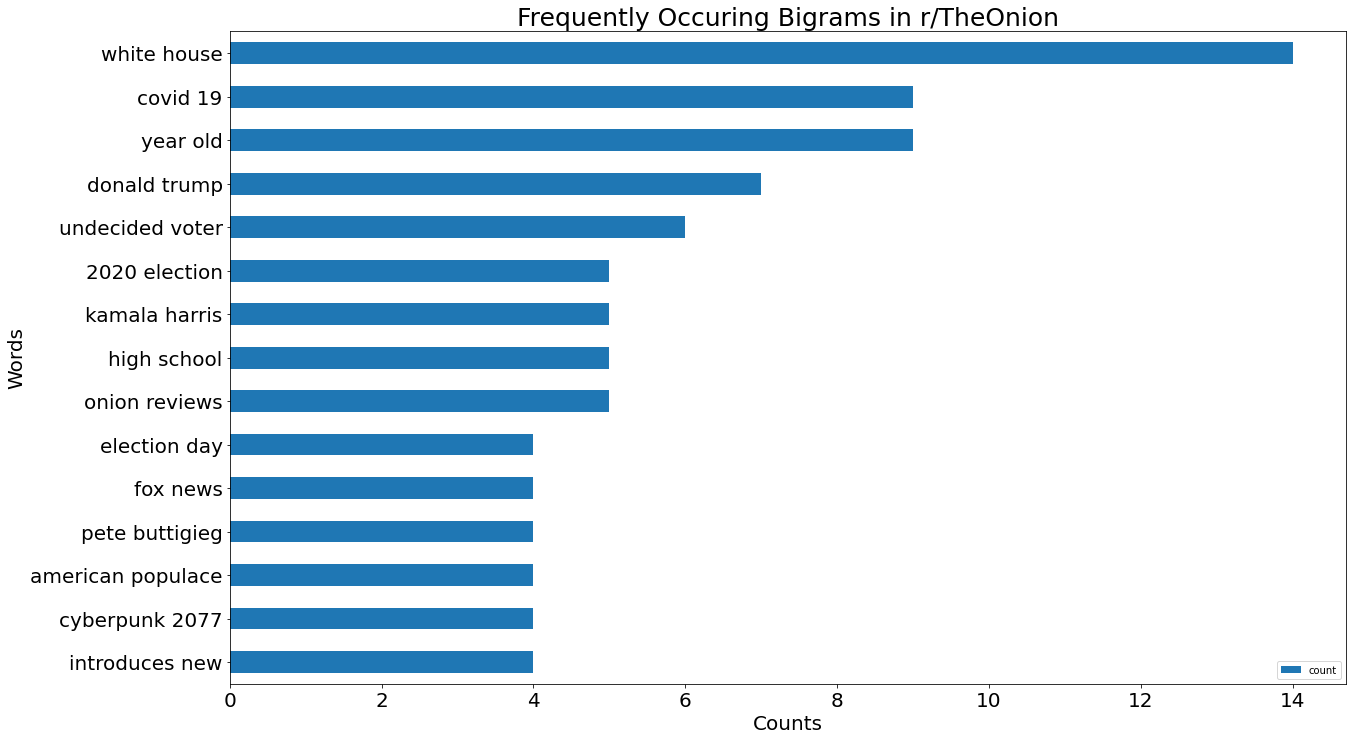

In [32]:
onion_bigram_counts = pd.DataFrame(term_counts(df = df_onion,n_gram=(2,2),stop_list = 'english'), columns=["count"])

onion_top_bigrams = onion_bigram_counts.head(15).sort_values(by = 'count',ascending = True)
onion_top_bigrams.plot(kind = 'barh',figsize=(20,12),fontsize=20)
plt.title('Frequently Occuring Bigrams in r/TheOnion',size = 25)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20)
#plt.figtext(.4,.4,f'Number of Unique Bigrams: {len(onion_bigram_counts)}')

#### TheOnion : no stop words

In [33]:
cvec = CountVectorizer()
# Fit our CountVectorizer on the training data and transform training data.
onion_cvec = pd.DataFrame(cvec.fit_transform(df_onion['title']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Words: {onion_cvec.shape[1]}')
onion_cvec.sum()[onion_cvec.sum() >= 25].sort_values(ascending = False)

Number of Unique Words: 4307


to          450
of          317
the         174
in          162
for         149
trump       104
on           93
after        87
with         83
by           70
from         68
and          67
it           56
man          55
as           54
new          51
be           49
that         47
into         46
out          45
he           45
biden        44
at           43
you          42
they         41
nation       39
up           37
about        36
all          36
just         32
not          32
election     32
is           31
can          31
down         31
this         30
will         28
white        27
who          27
says         27
onion        26
dtype: int64

#### TheOnion : bigrams, no stop words

In [34]:
cvec = CountVectorizer(ngram_range=(2,2))
# Fit our CountVectorizer on the training data and transform training data.
onion_bigram_cvec = pd.DataFrame(cvec.fit_transform(df_onion['title']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Bigrams: {onion_bigram_cvec.shape[1]}')
onion_bigram_cvec.sum()[onion_bigram_cvec.sum()>=10].sort_values(ascending = False)

Number of Unique Bigrams: 9329


the onion      21
to be          19
of the         17
white house    14
out of         12
enough to      10
dtype: int64

<AxesSubplot:>

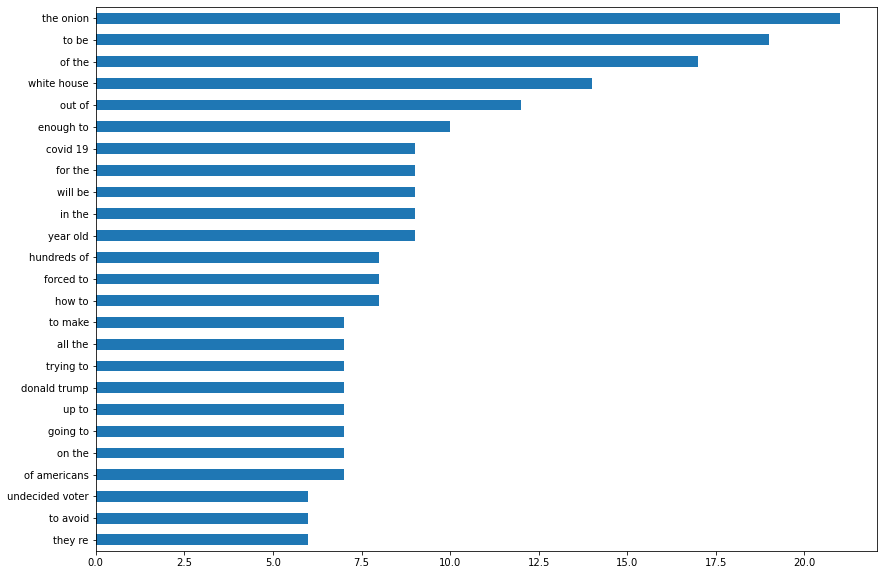

In [35]:
onion_bigram_cvec_top = onion_bigram_cvec.sum().sort_values(ascending = True).tail(25)
onion_bigram_cvec_top.plot(kind = 'barh',figsize=(14,10))

#### TheOnion : stop_words = 'english'

In [36]:
cvec = CountVectorizer(stop_words='english')
# Fit our CountVectorizer on the training data and transform training data.
onion_cvec_stop = pd.DataFrame(cvec.fit_transform(df_onion['title']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Words: {onion_cvec_stop.shape[1]}')
onion_cvec_stop.sum()[onion_cvec_stop.sum() >= 20].sort_values(ascending = False)

Number of Unique Words: 4099


trump          104
man             55
new             51
biden           44
nation          39
just            32
election        32
white           27
says            27
onion           26
like            23
house           23
woman           22
covid           21
coronavirus     21
dtype: int64

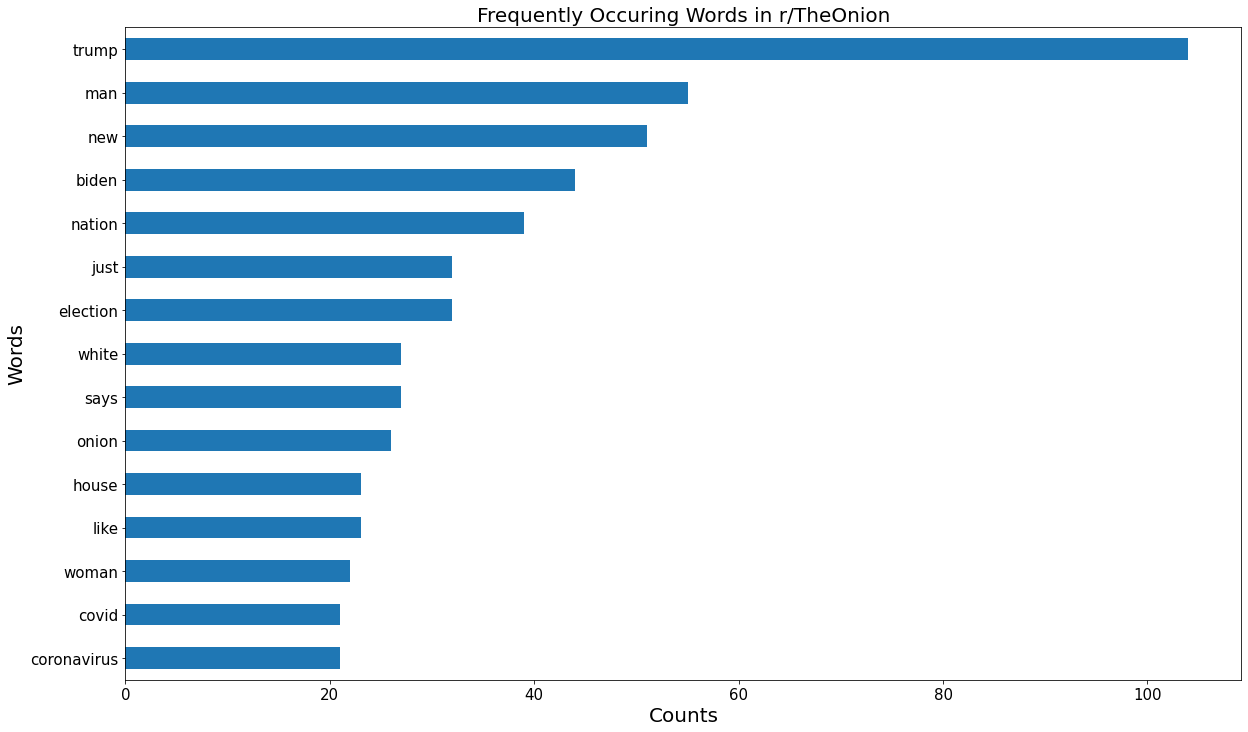

In [37]:
onion_cvec_stop_top = onion_cvec_stop.sum().sort_values(ascending = True).tail(15)
onion_cvec_stop_top.plot(kind = 'barh',figsize=(20,12),fontsize=15)
plt.title('Frequently Occuring Words in r/TheOnion',size = 20)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20);

#### TheOnion : bigrams, stop_words = 'english'

Text(0, 0.5, 'Words')

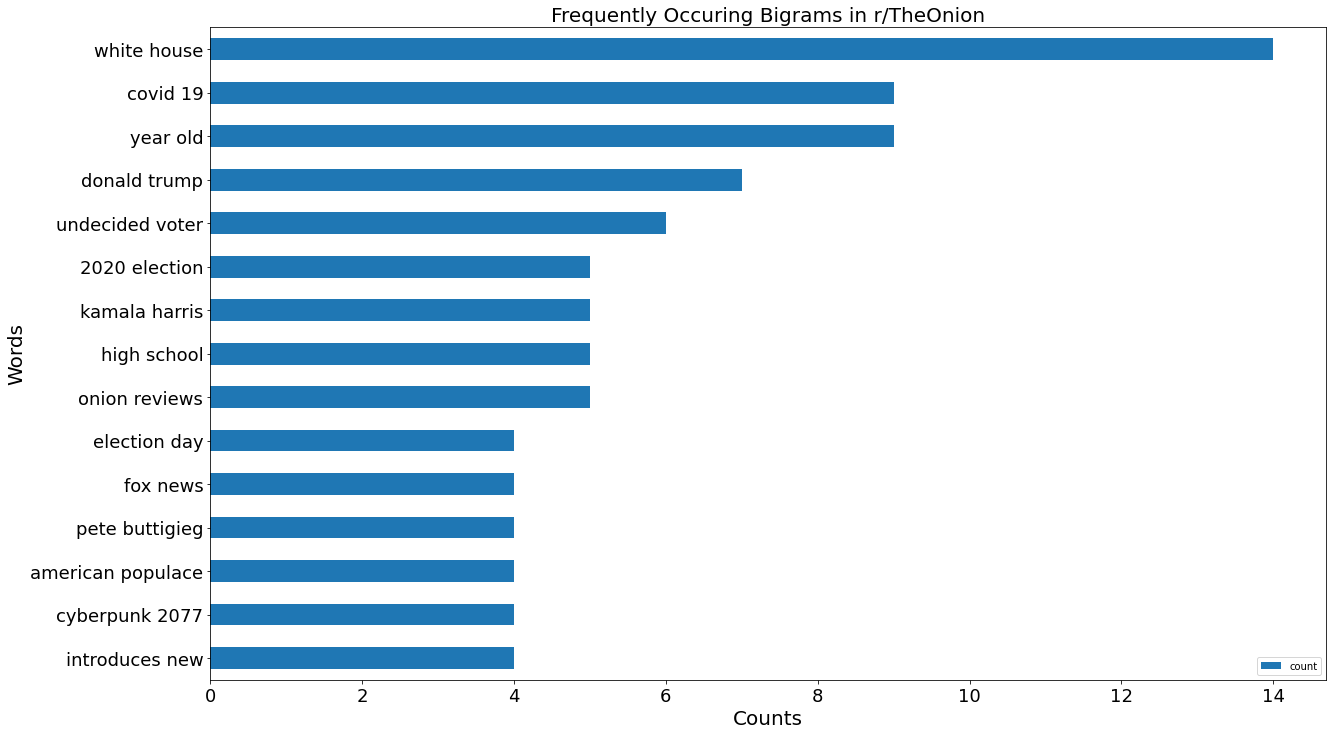

In [38]:
onion_bigram_counts = pd.DataFrame(term_counts(df = df_onion,n_gram=(2,2),stop_list = 'english'), columns=["count"])

onion_top_bigrams = onion_bigram_counts.head(15).sort_values(by = 'count',ascending = True)
onion_top_bigrams.plot(kind = 'barh',figsize=(20,12),fontsize=18)
plt.title('Frequently Occuring Bigrams in r/TheOnion',size = 20)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20)
#plt.figtext(20,20,s = f'Number of Unique Bigrams: {len(onion_top_bigrams)}');

In [39]:
cvec = CountVectorizer(stop_words='english',ngram_range=(2,2))
# Fit our CountVectorizer on the training data and transform training data.
onion_bigram_cvec_stop = pd.DataFrame(cvec.fit_transform(df_onion['title']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Bigrams: {onion_bigram_cvec_stop.shape[1]}')
onion_bigram_cvec_stop.sum()[onion_bigram_cvec_stop.sum() >= 5].sort_values(ascending = False)

Number of Unique Bigrams: 6506


white house        14
year old            9
covid 19            9
donald trump        7
undecided voter     6
onion reviews       5
kamala harris       5
high school         5
2020 election       5
dtype: int64

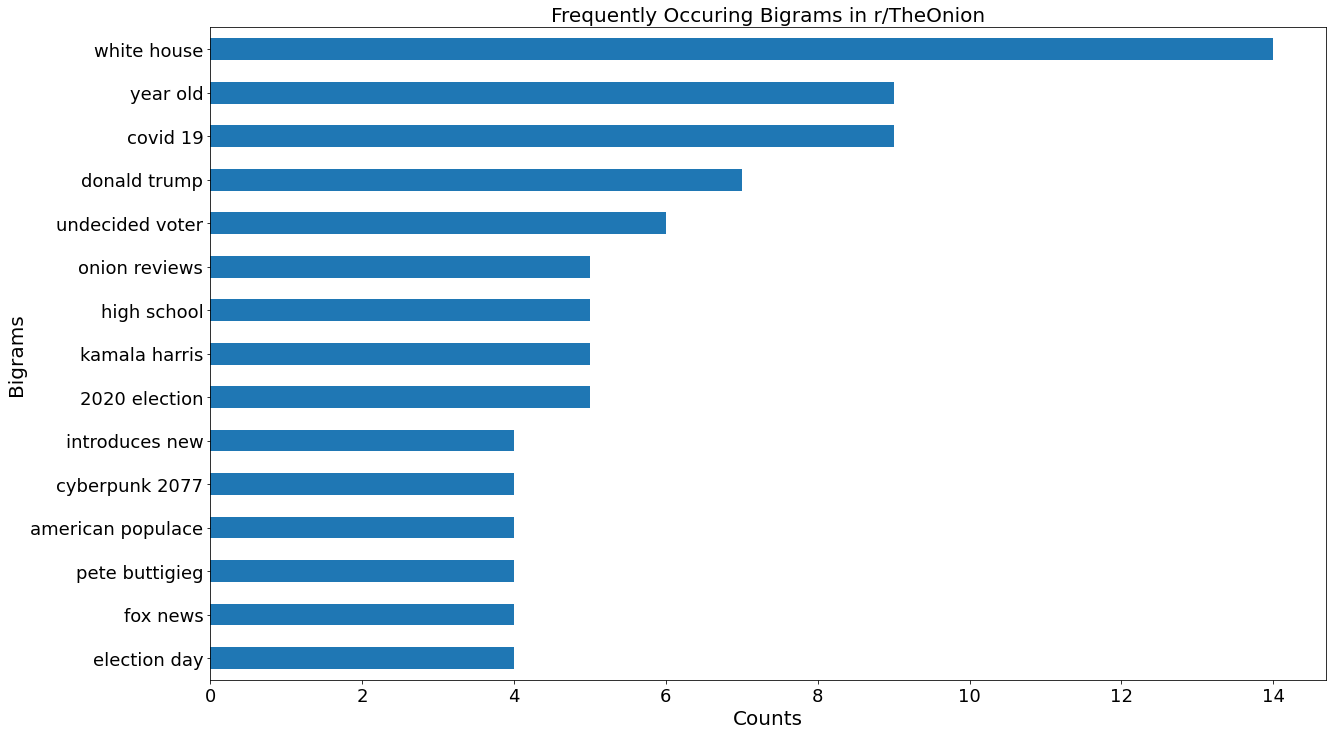

In [40]:
onion_bigram_cvec_stop_top = onion_bigram_cvec_stop.sum().sort_values(ascending = True).tail(15)
onion_bigram_cvec_stop_top.plot(kind = 'barh',figsize=(20,12),fontsize=18)
plt.title('Frequently Occuring Bigrams in r/TheOnion',size = 20)
plt.xlabel('Counts', size = 20)
plt.ylabel('Bigrams', size = 20);

#### Conspiracy : no stop words

In [41]:
# Instantiate CountVectorizer
cvec = CountVectorizer()
# Fit CountVectorizer on the training data and transform training data.
conspiracy_cvec = pd.DataFrame(cvec.fit_transform(df_conspiracy['title']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Words: {conspiracy_cvec.shape[1]}')
conspiracy_cvec.sum()[conspiracy_cvec.sum() >= 25].sort_values(ascending = False)

Number of Unique Words: 3908


the      655
to       317
of       267
and      237
is       223
        ... 
syria     27
more      26
here      25
new       25
your      25
Length: 65, dtype: int64

#### Conspiracy : bigram, no stop words

In [42]:
# Instantiate CountVectorizer
cvec = CountVectorizer(ngram_range=(2,2))
# Fit CountVectorizer on the training data and transform training data.
conspiracy_bigram_cvec = pd.DataFrame(cvec.fit_transform(df_conspiracy['title']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Bigrams: {conspiracy_bigram_cvec.shape[1]}')
conspiracy_bigram_cvec.sum()[conspiracy_bigram_cvec.sum() >= 9].sort_values(ascending = False)

Number of Unique Bigrams: 10005


of the           61
in the           44
from the         22
on the           20
covid 19         19
this is          19
and the          18
for the          18
is the           17
to the           17
to be            15
bill gates       14
do you           14
in syria         14
about the        14
the world        13
they are         13
you think        12
joe biden        11
by the           11
at the           11
are the          11
going to         10
tiffany dover    10
to get           10
we re             9
the covid         9
how the           9
the us            9
this sub          9
all the           9
dtype: int64

#### Conspiracy : stop_words = 'english'

In [43]:
cvec = CountVectorizer(stop_words='english')
# Fit our CountVectorizer on the training data and transform training data.
conspiracy_cvec_stop = pd.DataFrame(cvec.fit_transform(df_conspiracy['title']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Words: {conspiracy_cvec_stop.shape[1]}')
conspiracy_cvec_stop.sum()[conspiracy_cvec_stop.sum() >= 20].sort_values(ascending = False)

Number of Unique Words: 3678


covid         71
just          58
people        50
biden         46
conspiracy    40
time          29
amp           28
like          27
syria         27
vaccine       27
new           25
post          23
government    23
think         23
trump         23
going         22
world         22
does          21
real          20
dtype: int64

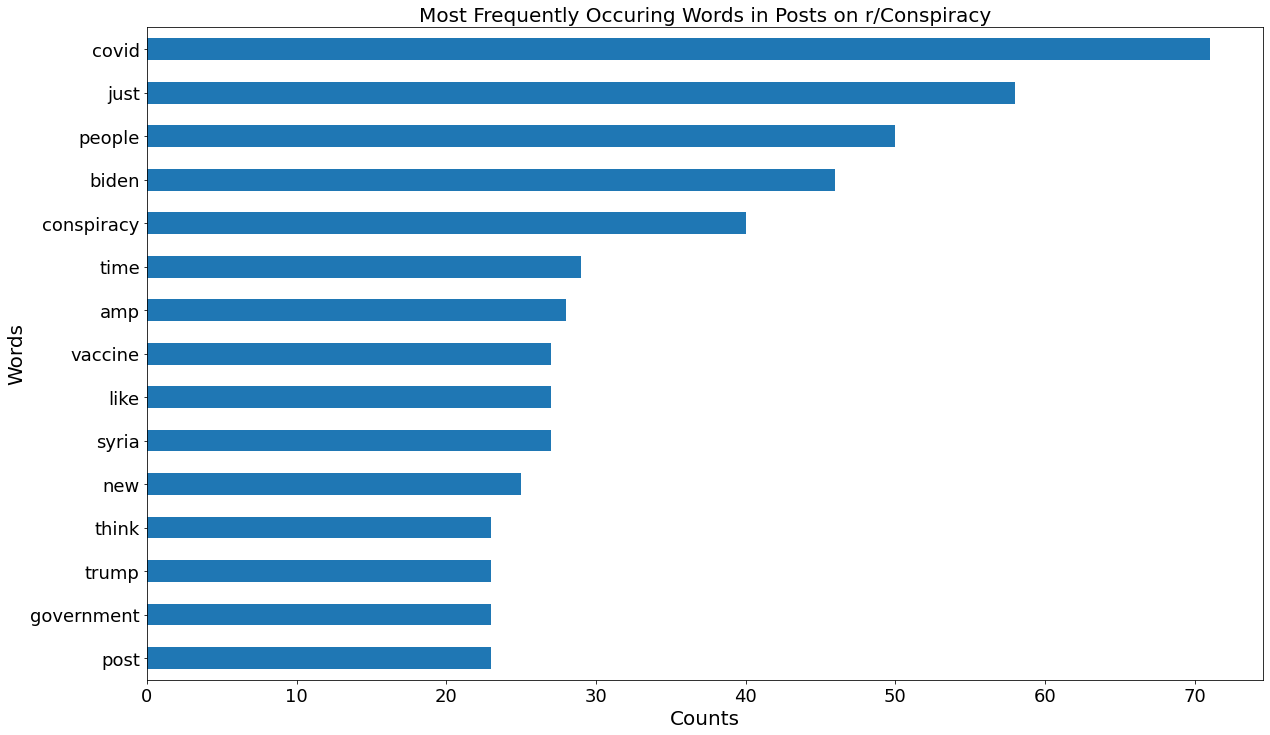

In [45]:
conspiracy_cvec_stop_top = conspiracy_cvec_stop.sum().sort_values(ascending = True).tail(15)
conspiracy_cvec_stop_top.plot(kind = 'barh',figsize=(20,12),fontsize=18)
plt.title('Frequently Occuring Words in r/Conspiracy',size = 20)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20);

#### Conspiracy : bigrams, stop_words = 'english'

In [46]:
# Instantiate CountVectorizer
cvec = CountVectorizer(stop_words = 'english',ngram_range=(2,2))
# Fit CountVectorizer on the training data and transform training data.
conspiracy_bigram_cvec_stop = pd.DataFrame(cvec.fit_transform(df_conspiracy['title']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Bigrams: {conspiracy_bigram_cvec_stop.shape[1]}')
conspiracy_bigram_cvec_stop.sum()[conspiracy_bigram_cvec_stop.sum() >= 5].sort_values(ascending = False)

Number of Unique Bigrams: 6210


covid 19         19
joe biden        11
tiffany dover    10
dtype: int64

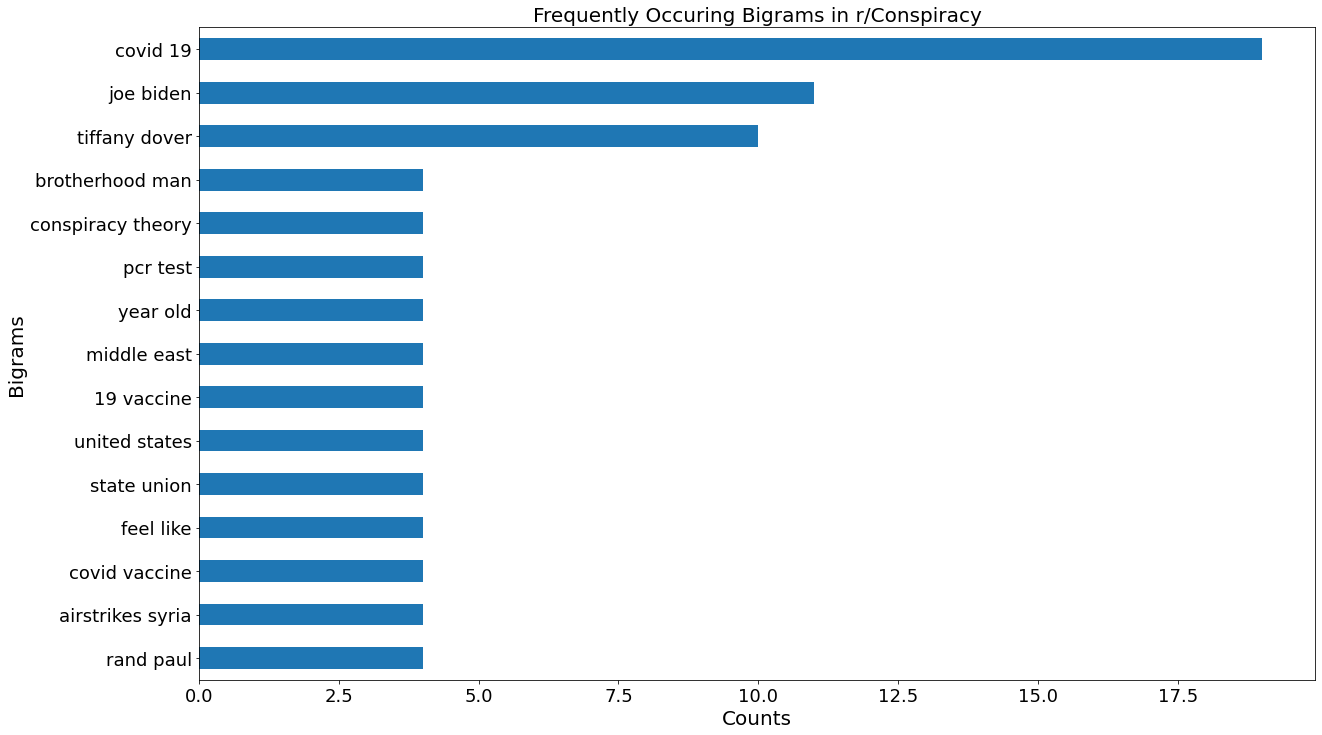

In [47]:
conspiracy_bigram_cvec_stop_top = conspiracy_bigram_cvec_stop.sum().sort_values(ascending = True).tail(15)
conspiracy_bigram_cvec_stop_top.plot(kind = 'barh',figsize=(20,12),fontsize=18)
plt.title('Frequently Occuring Bigrams in r/Conspiracy',size = 20)
plt.xlabel('Counts', size = 20)
plt.ylabel('Bigrams', size = 20);

In [48]:
# Find all common words in TheOnion and Conspiracy Posts
common_words = []
for i in list(onion_cvec_stop):
    for j in list(conspiracy_cvec_stop):
        if i == j:
            common_words.append(i)

In [49]:
len(common_words)

1367

### List of stop words common in both subreddits

In [50]:
stop_english_common = text.ENGLISH_STOP_WORDS.union(common_words)

In [51]:
cvec = CountVectorizer(stop_words=stop_english_common)
# Fit our CountVectorizer on the training data and transform training data.
conspiracy_cvec_stop_en_com = pd.DataFrame(cvec.fit_transform(df_conspiracy['title']).todense(),
                          columns = cvec.get_feature_names())
conspiracy_cvec_stop_en_com.sum()[conspiracy_cvec_stop_en_com.sum()>9].sort_values(ascending = False)

syria      27
11         18
gates      17
theory     14
sub        14
test       13
reddit     12
cpac       12
ufo        11
human      11
flu        11
cia        11
truth      10
science    10
iran       10
dover      10
dtype: int64

In [52]:
cvec = CountVectorizer(stop_words=stop_english_common)
# Fit our CountVectorizer on the training data and transform training data.
onion_cvec_stop_en_com = pd.DataFrame(cvec.fit_transform(df_onion['title']).todense(),
                          columns = cvec.get_feature_names())
onion_cvec_stop_en_com.sum()[onion_cvec_stop_en_com.sum()>=5].sort_values(ascending = False)

nation       39
onion        26
announces    13
gamers       13
voter        12
             ..
hopes         5
gaming        5
feeling       5
fan           5
announce      5
Length: 65, dtype: int64

## DataFrames Combined

In [53]:
df_combined = df_onion.append(df_conspiracy)

In [54]:
df_combined['subreddit'] = df_combined['subreddit'].map({'TheOnion': 1, 'conspiracy': 0})

In [55]:
df_combined.reset_index(inplace = True,drop = True)

### Export Combined Dataframe to CSV

In [56]:
df_combined.to_csv('./combined_data.csv')

# Part-3:  Modeling the System

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

## Creating features (X)  and target variable (y)

In [58]:
X = df_combined['title']
y = df_combined['subreddit']

## Checking The Baseline Accuracy

In [59]:
y.value_counts(normalize = True)

1    0.50108
0    0.49892
Name: subreddit, dtype: float64

## Function: Evaluating Vectorizers & Classifiers

In [60]:
vectorizer = [CountVectorizer(), TfidfVectorizer()]
classifier = [KNeighborsClassifier(),LogisticRegression(), MultinomialNB(), RandomForestClassifier()]
vec_param = { 'CountVectorizer': { 
                                    'CountVectorizer__max_features': [None,1200,2000,2250,3500],
                                    'CountVectorizer__min_df': [2,3,4],
                                    'CountVectorizer__max_df': [.3,.35,.4,.5],
                                    'CountVectorizer__ngram_range': [(1,1),(1,2)],
                                    'CountVectorizer__stop_words': [None,'english']
                                    },
               'TfidfVectorizer': {
                                    'TfidfVectorizer__max_features': [None,1200,2000,2250,3500],
                                    'TfidfVectorizer__min_df': [2,3,4],
                                    'TfidfVectorizer__max_df': [.3,.35,.4,.5],
                                    'TfidfVectorizer__ngram_range': [(1,1),(1,2)],
                                    'TfidfVectorizer__stop_words': [None,'english']  
                                    }
              }
clasf_param = { 'KNeighborsClassifier': {'KNeighborsClassifier__n_neighbors':[3,5,7]},
                'LogisticRegression': {'LogisticRegression__penalty': ['l1','l2']},
                'MultinomialNB': {},
                'RandomForestClassifier': {'RandomForestClassifier__max_depth': [90, 100, 110],
                                           #'RandomForestClassifier__max_features': [None, .5, .75, 'auto'],
                                           'RandomForestClassifier__n_estimators': [100, 200, 300]}
               }
vect_names = ['CountVectorizer','TfidfVectorizer']
clasf_names = ['KNeighborsClassifier','LogisticRegression','MultinomialNB','RandomForestClassifier']

In [61]:
def grid_pipe(X,y,vectorizers,classifiers,vects_names, clasfs_names, vec_params, clasf_params):
    t0 = time.time()
    score_list = []
    # Train Test Split Data
    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)
    
    for n_vec,vec in enumerate(vectorizers):
        for n_clasf,clasf in enumerate(classifiers):
            t1 = time.time()
            # Empty Dictionary used to create dataframe of model performance
            df_dict = {}
            
            # Create dictionary of Pipeline Params for Vectorizer-Classifier Combination
            pipe_params = {}
            vec_dict = vec_params[vects_names[n_vec]]
            clasf_dict = clasf_params[clasfs_names[n_clasf]]
            pipe_params.update(vec_dict)
            pipe_params.update(clasf_dict)
            
            # Instantiate Pipeline for Vectorizer-Classifier Combination
            pipe = Pipeline([
                (f'{vects_names[n_vec]}', vec),
                (f'{clasfs_names[n_clasf]}', clasf)
            ])
            
            # Run GridSearchCV to determine best params for Vectorizer-Classifier Combination
            gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3, n_jobs = -1,verbose = 1)
            gs.fit(X_train,y_train)
            
            best_estimator = gs.best_estimator_
#             print(f'Best Estimator: {best_estimator}')
            print(f'Vectorizer: {vects_names[n_vec]}, Classifier: {clasfs_names[n_clasf]}')
            print(f'Best Params: {gs.best_params_}')
            print(f'Best Score: {gs.best_score_}')
            print(f'\n')
            
            # Fit using Best Estimator
            best_estimator.fit(X_train, y_train)
            
            # Make predictions using Best Estimator
            pred_train = best_estimator.predict(X_train)
            pred_test  = best_estimator.predict(X_test)
            
            
            # create confusion matrices for Train and Test
            tn_train,fp_train,fn_train,tp_train  = confusion_matrix(y_train,pred_train).ravel()
            tn_test,fp_test,fn_test,tp_test  = confusion_matrix(y_test,pred_test).ravel()
            
            # Name of Vectorizer and Classifier
            df_dict['model_vectorizer']  = vects_names[n_vec]
            df_dict['model_classifier']  = clasfs_names[n_clasf]
            df_dict['model_best_params'] = gs.best_params_
            
            # Calculate Accuracy of Train and Test Predictions
            df_dict['train_accuracy'] = accuracy_score(y_train,pred_train)
            df_dict['test_accuracy']  = accuracy_score(y_test,pred_test)
            
            # Calculate Sensitivity of Train and Test Predicitons
            df_dict['train_sensitivity'] = recall_score(y_train,pred_train)
            df_dict['test_sensitivity']  = recall_score(y_test,pred_test)
            
            # Calculate Specificity of Train and Test Predicitons
            df_dict['train_specificity'] = (tn_train/(tn_train+fp_train))
            df_dict['test_specificity']  = (tn_test/(tn_test+fp_test))
            
            # Calculate Precision of Train and Test Predicitons
            df_dict['train_precision'] = precision_score(y_train,pred_train)
            df_dict['test_precision']  = precision_score(y_test,pred_test)
            
            score_list.append(df_dict)
            t2 = time.time()
            print(f'Run Time for {vects_names[n_vec]} & {clasfs_names[n_clasf]}: {t2-t1}\n')
    t3 = time.time()
    print(f'Total Run Time: {t3-t0}')
    return(pd.DataFrame(data = score_list))

In [62]:
model_df = grid_pipe(X = X,
                     y = y,
                     vectorizers  = vectorizer,
                     classifiers  = classifier,
                     vects_names  = vect_names,
                     clasfs_names = clasf_names,
                     vec_params   = vec_param,
                     clasf_params = clasf_param)
model_df

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
/Users/tahir/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   19.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Vectorizer: CountVectorizer, Classifier: KNeighborsClassifier
Best Params: {'CountVectorizer__max_df': 0.35, 'CountVectorizer__max_features': None, 'CountVectorizer__min_df': 4, 'CountVectorizer__ngram_range': (1, 2), 'CountVectorizer__stop_words': None, 'KNeighborsClassifier__n_neighbors': 5}
Best Score: 0.6025917926565875


Run Time for CountVectorizer & KNeighborsClassifier: 19.28921604156494

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/Users/tahir/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Vectorizer: CountVectorizer, Classifier: LogisticRegression
Best Params: {'CountVectorizer__max_df': 0.35, 'CountVectorizer__max_features': None, 'CountVectorizer__min_df': 3, 'CountVectorizer__ngram_range': (1, 2), 'CountVectorizer__stop_words': None, 'LogisticRegression__penalty': 'l2'}
Best Score: 0.7984161267098632


Run Time for CountVectorizer & LogisticRegression: 8.597017288208008

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Vectorizer: CountVectorizer, Classifier: MultinomialNB
Best Params: {'CountVectorizer__max_df': 0.35, 'CountVectorizer__max_features': None, 'CountVectorizer__min_df': 2, 'CountVectorizer__ngram_range': (1, 1), 'CountVectorizer__stop_words': None}
Best Score: 0.7962562994960404


Run Time for CountVectorizer & MultinomialNB: 3.6516010761260986

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


/Users/tahir/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elaps

Vectorizer: CountVectorizer, Classifier: RandomForestClassifier
Best Params: {'CountVectorizer__max_df': 0.4, 'CountVectorizer__max_features': None, 'CountVectorizer__min_df': 2, 'CountVectorizer__ngram_range': (1, 2), 'CountVectorizer__stop_words': None, 'RandomForestClassifier__max_depth': 110, 'RandomForestClassifier__n_estimators': 100}
Best Score: 0.804895608351332


Run Time for CountVectorizer & RandomForestClassifier: 461.9537811279297

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
/Users/tahir/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Vectorizer: TfidfVectorizer, Classifier: KNeighborsClassifier
Best Params: {'KNeighborsClassifier__n_neighbors': 3, 'TfidfVectorizer__max_df': 0.3, 'TfidfVectorizer__max_features': None, 'TfidfVectorizer__min_df': 4, 'TfidfVectorizer__ngram_range': (1, 2), 'TfidfVectorizer__stop_words': 'english'}
Best Score: 0.6155507559395249


Run Time for TfidfVectorizer & KNeighborsClassifier: 18.21776294708252

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
/Users/tahir/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Vectorizer: TfidfVectorizer, Classifier: LogisticRegression
Best Params: {'LogisticRegression__penalty': 'l2', 'TfidfVectorizer__max_df': 0.3, 'TfidfVectorizer__max_features': None, 'TfidfVectorizer__min_df': 3, 'TfidfVectorizer__ngram_range': (1, 2), 'TfidfVectorizer__stop_words': None}
Best Score: 0.7998560115190786


Run Time for TfidfVectorizer & LogisticRegression: 8.294955015182495

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 705 out of 720 | elapsed:    3.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Vectorizer: TfidfVectorizer, Classifier: MultinomialNB
Best Params: {'TfidfVectorizer__max_df': 0.35, 'TfidfVectorizer__max_features': None, 'TfidfVectorizer__min_df': 2, 'TfidfVectorizer__ngram_range': (1, 1), 'TfidfVectorizer__stop_words': None}
Best Score: 0.7897768178545718


Run Time for TfidfVectorizer & MultinomialNB: 3.8928041458129883

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


/Users/tahir/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elaps

Vectorizer: TfidfVectorizer, Classifier: RandomForestClassifier
Best Params: {'RandomForestClassifier__max_depth': 90, 'RandomForestClassifier__n_estimators': 100, 'TfidfVectorizer__max_df': 0.5, 'TfidfVectorizer__max_features': None, 'TfidfVectorizer__min_df': 4, 'TfidfVectorizer__ngram_range': (1, 2), 'TfidfVectorizer__stop_words': None}
Best Score: 0.8041756659467243


Run Time for TfidfVectorizer & RandomForestClassifier: 472.72821617126465

Total Run Time: 996.6329560279846


,model_vectorizer,model_classifier,model_best_params,train_accuracy,test_accuracy,train_sensitivity,test_sensitivity,train_specificity,test_specificity,train_precision,test_precision
0,CountVectorizer,KNeighborsClassifier,"{'CountVectorizer__max_df': 0.35, 'CountVector...",0.706263,0.589633,0.438218,0.237069,0.975469,0.943723,0.947205,0.808824
1,CountVectorizer,LogisticRegression,"{'CountVectorizer__max_df': 0.35, 'CountVector...",0.968323,0.820734,0.966954,0.797414,0.969697,0.844156,0.969741,0.837104
2,CountVectorizer,MultinomialNB,"{'CountVectorizer__max_df': 0.35, 'CountVector...",0.932325,0.816415,0.920977,0.767241,0.943723,0.865801,0.942647,0.851675
3,CountVectorizer,RandomForestClassifier,"{'CountVectorizer__max_df': 0.4, 'CountVectori...",0.993521,0.809935,0.987069,0.702586,1.000000,0.917749,1.000000,0.895604
4,TfidfVectorizer,KNeighborsClassifier,"{'KNeighborsClassifier__n_neighbors': 3, 'Tfid...",0.708423,0.563715,0.468391,0.228448,0.949495,0.900433,0.903047,0.697368
5,TfidfVectorizer,LogisticRegression,"{'LogisticRegression__penalty': 'l2', 'TfidfVe...",0.913607,0.809935,0.938218,0.806034,0.888889,0.813853,0.894521,0.813043
6,TfidfVectorizer,MultinomialNB,"{'TfidfVectorizer__max_df': 0.35, 'TfidfVector...",0.945284,0.816415,0.928161,0.762931,0.962482,0.870130,0.961310,0.855072
7,TfidfVectorizer,RandomForestClassifier,"{'RandomForestClassifier__max_depth': 90, 'Ran...",0.990641,0.790497,0.984195,0.728448,0.997114,0.852814,0.997089,0.832512


## Part-4: Pipeline and GridSearchCV

### Train Test Split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

### Logistic Regression Pipelines

#### CountVectorizer

In [64]:
pipe_cvec_lr = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

pipe_params_cvec_lr = {
    'cvec__max_features': [850,900,950],
    'cvec__min_df': [2,3,4],
    'cvec__max_df': [.3,.33,.5],
    'cvec__ngram_range': [(1,1),(1,2)],
    'cvec__stop_words': [None,'english'],
    'lr__penalty': ['l1','l2']
}

gs = GridSearchCV(pipe_cvec_lr, param_grid=pipe_params_cvec_lr, cv=3,n_jobs = 2,verbose = 1)
gs.fit(X_train,y_train)

print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters: {gs.best_params_}')
print(f'Train Accuracy Score: {gs.score(X_train,y_train)}')
print(f'Test Accuracy Score: {gs.score(X_test,y_test)}')
pd.DataFrame(confusion_matrix(y_test,gs.predict(X_test)),
                              index = ['actual conspiracy', 'actual onion'],
                              columns = ['predicted conspiracy', 'predicted onion'])

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 216 tasks      | elapsed:    3.8s


Best Score: 0.8012958963282936
Best Parameters: {'cvec__max_df': 0.33, 'cvec__max_features': 900, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'lr__penalty': 'l2'}
Train Accuracy Score: 0.9409647228221742
Test Accuracy Score: 0.8077753779697624


[Parallel(n_jobs=2)]: Done 648 out of 648 | elapsed:    9.4s finished


,predicted conspiracy,predicted onion
actual conspiracy,189,42
actual onion,47,185


#### TF-IDF Vectorizer

In [65]:
pipe_tvec_lr = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

pipe_params_tvec_lr = {
    'tvec__max_features': [900,1000,1100],
    'tvec__min_df': [3,4,5],
    'tvec__max_df': [.3,.31,.33],
    'tvec__ngram_range': [(1,1),(1,2)],
    'tvec__stop_words': [None, stop_english_common,'english'],
    'lr__penalty': ['l1','l2']
}

gs = GridSearchCV(pipe_tvec_lr, param_grid=pipe_params_tvec_lr, cv=3, n_jobs = 2, verbose = 1)
gs.fit(X_train,y_train)
print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters: {gs.best_params_}')
print(f'Train Accuracy Score: {gs.score(X_train,y_train)}')
print(f'Test Accuracy Score: {gs.score(X_test,y_test)}')
pd.DataFrame(confusion_matrix(y_test,gs.predict(X_test)),
                              index = ['actual conspiracy', 'actual onion'],
                              columns = ['predicted conspiracy', 'predicted onion'])

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 540 tasks      | elapsed:    5.3s


Best Score: 0.7998560115190786
Best Parameters: {'lr__penalty': 'l2', 'tvec__max_df': 0.3, 'tvec__max_features': 1100, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
Train Accuracy Score: 0.8970482361411087
Test Accuracy Score: 0.8012958963282938


[Parallel(n_jobs=2)]: Done 972 out of 972 | elapsed:   11.4s finished


,predicted conspiracy,predicted onion
actual conspiracy,184,47
actual onion,45,187


### Multinomial Naive Bayes

#### CountVectorizer

In [66]:
pipe_cvec_mnb = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

pipe_params_cvec_mnb = {
    'cvec__max_features': [None,1000,1100,1200,1300],
    'cvec__min_df': [2,3,4],
    'cvec__max_df': [.3,.32,.33,.34],
    'cvec__ngram_range': [(1,1),(1,2),(1,3)],
    'cvec__stop_words': [None, stop_english_common,'english']
}

gs = GridSearchCV(pipe_cvec_mnb, param_grid=pipe_params_cvec_mnb, cv=3, n_jobs = 3, verbose = 1)
gs.fit(X_train,y_train)
print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters: {gs.best_params_}')
print(f'Train Accuracy Score: {gs.score(X_train,y_train)}')
print(f'Test Accuracy Score: {gs.score(X_test,y_test)}')
pd.DataFrame(confusion_matrix(y_test,gs.predict(X_test)),
                              index = ['actual conspiracy', 'actual onion'],
                              columns = ['predicted conspiracy', 'predicted onion'])

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 166 tasks      | elapsed:    2.3s
/Users/tahir/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=3)]: Done 1366 tasks      | elapsed:   14.7s


Best Score: 0.7969762419006479
Best Parameters: {'cvec__max_df': 0.33, 'cvec__max_features': None, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
Train Accuracy Score: 0.9323254139668826
Test Accuracy Score: 0.816414686825054


[Parallel(n_jobs=3)]: Done 1620 out of 1620 | elapsed:   17.2s finished


,predicted conspiracy,predicted onion
actual conspiracy,200,31
actual onion,54,178


#### TF-IDF Vectorizer

In [67]:
pipe_tvec_mnb = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

pipe_params_tvec_mnb = {
    'tvec__max_features': [1300,1400,1500],
    'tvec__min_df': [2,3,4],
    'tvec__max_df': [.3,.31,.32,.33],
    'tvec__ngram_range': [(1,1),(1,2)],
    'tvec__stop_words': [None,stop_english_common,'english']
}

gs = GridSearchCV(pipe_tvec_mnb, param_grid=pipe_params_tvec_mnb, cv=3,n_jobs = 3,verbose = 1)
gs.fit(X_train,y_train)
print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters: {gs.best_params_}')
print(f'Train Accuracy Score: {gs.score(X_train,y_train)}')
print(f'Test Accuracy Score: {gs.score(X_test,y_test)}')
pd.DataFrame(confusion_matrix(y_test,gs.predict(X_test)),
                              index = ['actual conspiracy', 'actual onion'],
                              columns = ['predicted conspiracy', 'predicted onion'])

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 250 tasks      | elapsed:    2.2s
/Users/tahir/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Score: 0.7919366450683946
Best Parameters: {'tvec__max_df': 0.33, 'tvec__max_features': 1300, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': None}
Train Accuracy Score: 0.9272858171346292
Test Accuracy Score: 0.8077753779697624


[Parallel(n_jobs=3)]: Done 648 out of 648 | elapsed:    5.8s finished


,predicted conspiracy,predicted onion
actual conspiracy,196,35
actual onion,54,178


### Random Forest

#### CountVectorizer

In [68]:
pipe_cvec_rf = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe_params_cvec_rf = {
###### Count Vectorizer Params ######   
    'cvec__max_features': [2500,3000,3500],
    'cvec__min_df': [3,4,5],
    'cvec__max_df': [.4,.45,.5],
    'cvec__ngram_range': [(1,1),(1,2)],
    'cvec__stop_words': [None,'english'],
###### Randaom Forest Params ######
    'rf__max_depth': [None,2,5],
    #'rf__max_features': [None, .5, .75, 'auto'],
    'rf__n_estimators': [1200, 1350, 1500]
}

gs = GridSearchCV(pipe_cvec_rf, param_grid=pipe_params_cvec_rf, cv=3,n_jobs=-1,verbose=1)
gs.fit(X_train,y_train)
print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters: {gs.best_params_}')
print(f'Train Accuracy Score: {gs.score(X_train,y_train)}')
print(f'Test Accuracy Score: {gs.score(X_test,y_test)}')
pd.DataFrame(confusion_matrix(y_test,gs.predict(X_test)),
                              index = ['actual conspiracy', 'actual onion'],
                              columns = ['predicted conspiracy', 'predicted onion'])

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.2s
/Users/tahir/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 2916 out of 2916 | elapsed: 16.4min finished


Best Score: 0.7998560115190786
Best Parameters: {'cvec__max_df': 0.45, 'cvec__max_features': 3000, 'cvec__min_df': 4, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'rf__max_depth': None, 'rf__n_estimators': 1200}
Train Accuracy Score: 0.9949604031677466
Test Accuracy Score: 0.8099352051835853


,predicted conspiracy,predicted onion
actual conspiracy,210,21
actual onion,67,165


#### TF-IDF Vectorizer

In [69]:
pipe_tvec_rf = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe_params_tvec_rf = {
    'tvec__max_features': [3300,3750],
    'tvec__min_df': [2,3],
    'tvec__max_df': [.9,.98],
    'tvec__ngram_range': [(1,1),(1,2),(2,2)],
    'tvec__stop_words': [None,'english'],
    'rf__max_depth': [5,10],
    #'rf__max_features': [None, .5, .75, 'auto'],
    'rf__n_estimators': [300,500]
}

gs = GridSearchCV(pipe_tvec_rf, param_grid=pipe_params_tvec_rf, cv=3,verbose = 1, n_jobs=3)
gs.fit(X_train,y_train)
print(f'Best Score: {gs.best_score_}')
print(f'Best Parameters: {gs.best_params_}')

print(f'Train Accuracy Score: {gs.score(X_train,y_train)}')
print(f'Test Accuracy Score: {gs.score(X_test,y_test)}')
pd.DataFrame(confusion_matrix(y_test,gs.predict(X_test)),
                              index = ['actual conspiracy', 'actual onion'],
                              columns = ['predicted conspiracy', 'predicted onion'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    4.8s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   20.8s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   50.3s
[Parallel(n_jobs=3)]: Done 576 out of 576 | elapsed:  1.2min finished


Best Score: 0.7883369330453563
Best Parameters: {'rf__max_depth': 10, 'rf__n_estimators': 500, 'tvec__max_df': 0.9, 'tvec__max_features': 3300, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': None}
Train Accuracy Score: 0.8675305975521959
Test Accuracy Score: 0.775377969762419


,predicted conspiracy,predicted onion
actual conspiracy,181,50
actual onion,54,178


## Summary and Conclusion

The highest accuracy in predicting the classification of posts based on their titles is the CountVectorizer with Multinomial Naive Bayes Classifier and Logistic regression, respectively:

A Train Accuracy Score: 0.93

A Test Accuracy Score: 0.82

### and


A training set accuracy score of 0.94,

A testing set accuracy score of 0.81.